# Flight Ticket Price Analysis ✈️

## Introduction

In this project, we explore how various factors influence flight ticket prices using a real-world dataset containing information on thousands of flight records in India.

Our objective is to identify trends, patterns, and statistically significant relationships between ticket prices and features such as:

- Airline
- Departure and arrival time
- Source and destination cities
- Flight duration
- Number of days left before departure
- Travel class (Economy 
The dataset contains over **290,000 rows**or Business)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv("airlines_flights_data.csv")
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
# Checking Missing Values
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [61]:
# Checking Outliers 
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column} sütununda {outliers.shape[0]} adet aykırı değer var.")
    return outliers

# Uygulama
for col in ['price', 'duration']:
    detect_outliers_iqr(df, col)

# Orijinal veri setinden bir kopya al
df_cleaned = df.copy()

# IQR yöntemi ile outlier baskılama (price değişkeni için)
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outlier'ları sınırlar içine baskıla 
df_cleaned['price'] = df_cleaned['price'].clip(lower=lower_bound, upper=upper_bound)


price sütununda 123 adet aykırı değer var.
duration sütununda 2110 adet aykırı değer var.


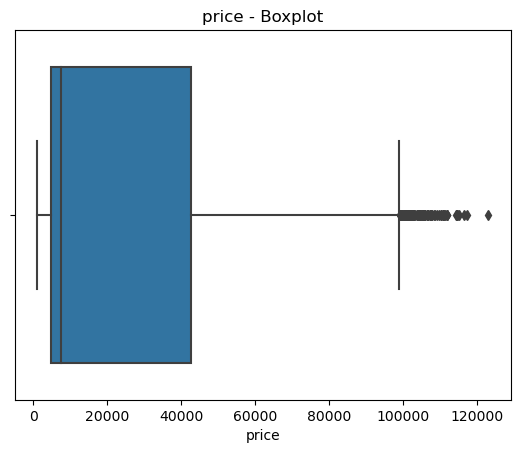

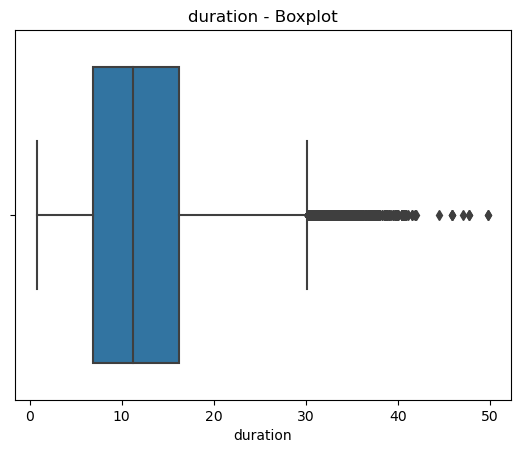

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['price', 'duration']:
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.show()

 ## Does ticket price change based on days_left?

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


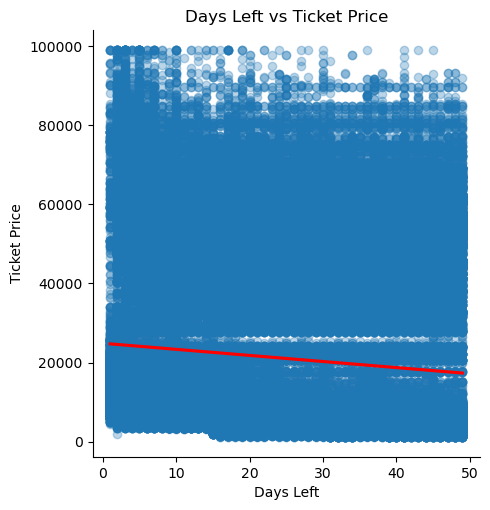

In [62]:
sns.lmplot(
    x='days_left',
    y='price',
    data=df_cleaned,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)

plt.title("Days Left vs Ticket Price")
plt.xlabel("Days Left")
plt.ylabel("Ticket Price")
plt.show()

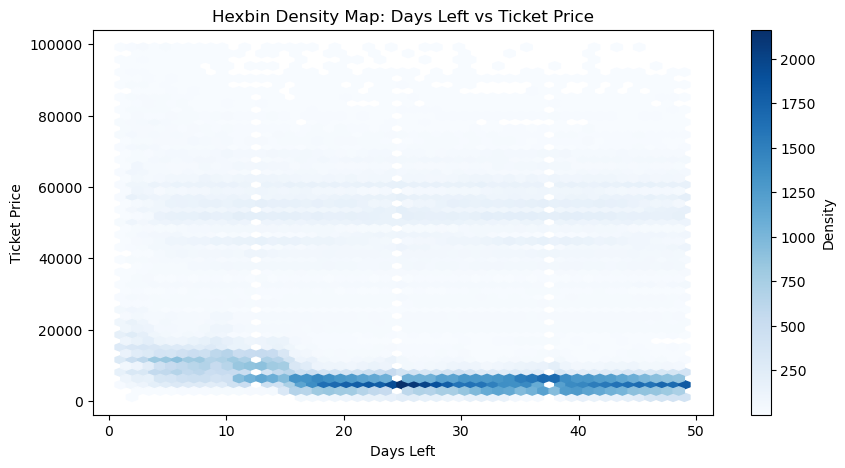

In [63]:
plt.figure(figsize=(10, 5))
plt.hexbin(df_cleaned['days_left'], df_cleaned['price'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Density')
plt.xlabel("Days Left")
plt.ylabel("Ticket Price")
plt.title("Hexbin Density Map: Days Left vs Ticket Price")
plt.show()


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Bağımsız ve bağımlı değişkenleri belirle
X = df_cleaned[['days_left']]
y = df_cleaned['price']

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Modeli kur ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Model katsayılarını yazdır
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Coefficient (β₁ - price change per day): {model.coef_[0]:.2f}")

# Tahmin yap
y_pred = model.predict(X_test)

# Model performansı
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} ₺")


Intercept (β₀): 24972.65
Coefficient (β₁ - price change per day): -156.30
R² Score: 0.0073
Mean Absolute Error (MAE): 19688.14 ₺


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Yalnızca Economy sınıfını al
df_economy_cleaned = df_cleaned[df_cleaned['class'] == 'Economy']

# Giriş ve çıkış değişkenleri
X = df_economy_cleaned[['days_left']]
y = df_economy_cleaned['price']

# Eğitim/test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model kur ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Sonuçları yazdır
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Price change per day (β₁): {model.coef_[0]:.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f} ₺")


Intercept (β₀): 10638.33
Price change per day (β₁): -155.43
R² Score: 0.3116
Mean Absolute Error (MAE): 2319.82 ₺


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Sadece Economy sınıfını al
df_economy = df_cleaned[df_cleaned['class'] == 'Economy'].copy()

# 2. IQR hesapla
Q1 = df_economy['price'].quantile(0.25)
Q3 = df_economy['price'].quantile(0.75)
IQR = Q3 - Q1

# 3. Alt ve üst sınırları belirle
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Aykırı değerleri baskıla (clip)
df_economy['price_capped'] = df_economy['price'].clip(lower=lower_bound, upper=upper_bound)

# 5. Regresyon modeli
X = df_economy[['days_left']]
y = df_economy['price_capped']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 6. Sonuçları yazdır
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Price change per day (β₁): {model.coef_[0]:.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} ₺")


Intercept (β₀): 9819.19
Price change per day (β₁): -132.66
R² Score: 0.3321
MAE: 2065.16 ₺


In [70]:
# 1. Sadece Business sınıfını filtrele
df_business = df_cleaned[df_cleaned['class'] == 'Business'].copy()

# 2. IQR yöntemi ile outlier sınırlarını belirle
Q1 = df_business['price'].quantile(0.25)
Q3 = df_business['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Aykırı fiyatları baskıla (clip ile)
df_business['price_capped'] = df_business['price'].clip(lower=lower_bound, upper=upper_bound)

# 4. Model girdileri
X = df_business[['days_left']]
y = df_business['price_capped']

# 5. Eğitim ve test verilerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Lineer regresyon modeli eğit
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Tahmin ve değerlendirme
y_pred = model.predict(X_test)

print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Price change per day (β₁): {model.coef_[0]:.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} ₺")


Intercept (β₀): 54511.25
Price change per day (β₁): -79.21
R² Score: 0.0082
MAE: 9586.89 ₺


# Conclusion:

- For **Economy class**, there is a reasonable relationship between `days_left` and ticket price.
- For **Business class**, this variable alone is not meaningful enough to explain the price.


## Does ticket price vary across different airlines?

In [71]:
df_cleaned['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [72]:
df_cleaned.groupby('airline')['price'].mean().sort_values(ascending=False)

airline
Vistara      30391.234610
Air_India    23507.019112
SpiceJet      6179.278881
GO_FIRST      5652.007595
Indigo        5324.216303
AirAsia       4091.072742
Name: price, dtype: float64

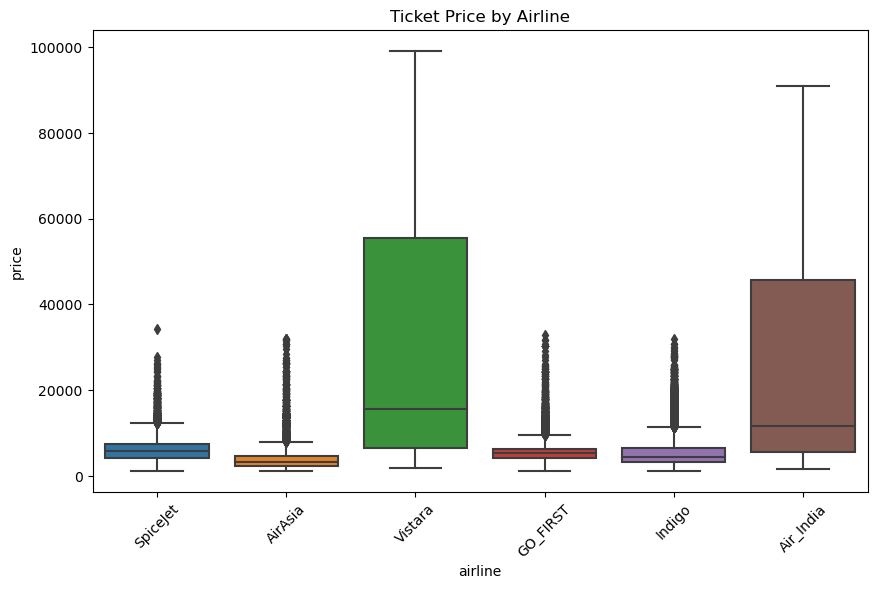

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='airline', y='price', data=df_cleaned)
plt.title("Ticket Price by Airline")
plt.xticks(rotation=45)
plt.show()

In [75]:
from scipy.stats import f_oneway

# Örneğin temizlenmiş ve outlier'lar baskılanmış veri kullanılıyorsa:
groups = [df_cleaned[df_cleaned['airline'] == a]['price'] for a in df_cleaned['airline'].unique()]

f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")


F-statistic: 17202.2252
P-value: 0.0000


# Analysis Summary:

- We analyzed the ticket prices across six different airlines.
- According to the **boxplot**, there is a visible price difference, especially between **Vistara**, **Air India**, and the other budget airli.
- We performed a **one-way ANOVA test** to determine if the price differences among airlines are statistically significant.
- The resulting **p-value was approximately 0.0000**, which is far below the typical significance threshold (0.05).o).

## Does ticket price vary based on departure time and arrival time?

In [76]:
# Departure time kategorileri
print("Unique values in 'departure_time':")
print(df_cleaned['departure_time'].unique())

# Arrival time kategorileri
print("\nUnique values in 'arrival_time':")
print(df_cleaned['arrival_time'].unique())


Unique values in 'departure_time':
['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night', 'Late_Night']
Categories (6, object): ['Early_Morning' < 'Morning' < 'Afternoon' < 'Evening' < 'Night' < 'Late_Night']

Unique values in 'arrival_time':
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


In [77]:
print("Average price by departure_time and class:")
print(df_cleaned.groupby(['class', 'departure_time'])['price'].mean().round(2))

print("\nAverage price by arrival_time and class:")
print(df_cleaned.groupby(['class', 'arrival_time'])['price'].mean().round(2))

Average price by departure_time and class:
class     departure_time
Business  Early_Morning     52440.06
          Morning           53355.00
          Afternoon         51054.99
          Evening           52684.92
          Night             52508.57
          Late_Night        47471.97
Economy   Early_Morning      6560.32
          Morning            7119.02
          Afternoon          6473.10
          Evening            6360.75
          Night              6205.96
          Late_Night         4784.70
Name: price, dtype: float64

Average price by arrival_time and class:
class     arrival_time 
Business  Afternoon        48581.38
          Early_Morning    47699.75
          Evening          54185.55
          Late_Night       51856.98
          Morning          51952.20
          Night            53581.27
Economy   Afternoon         6407.03
          Early_Morning     5336.66
          Evening           7206.77
          Late_Night        5173.09
          Morning           6416.4

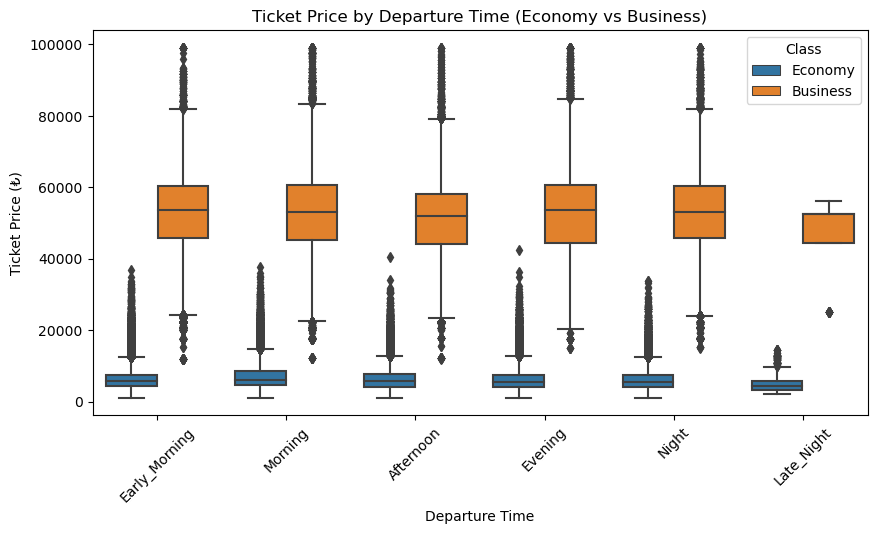

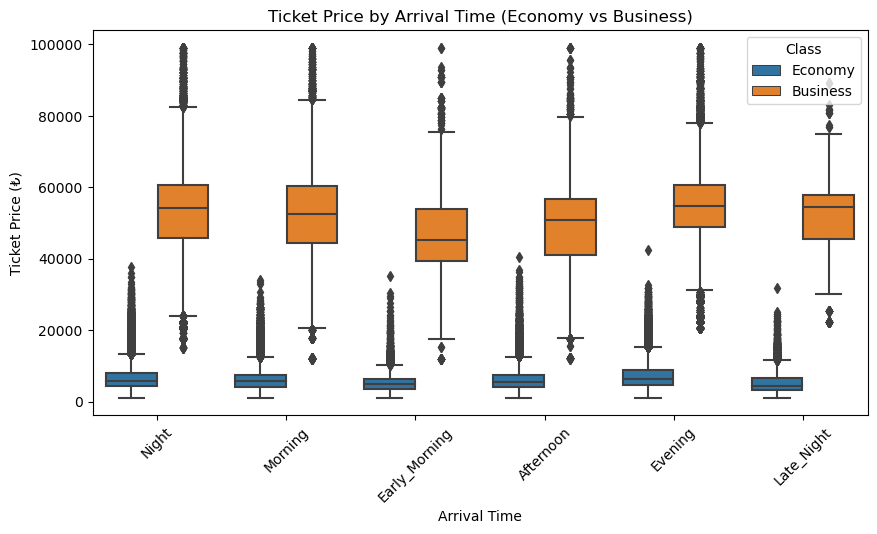

In [78]:
# Departure time boxplot (df_cleaned)
plt.figure(figsize=(10, 5))
sns.boxplot(x='departure_time', y='price', hue='class', data=df_cleaned)
plt.title("Ticket Price by Departure Time (Economy vs Business)")
plt.xlabel("Departure Time")
plt.ylabel("Ticket Price (₺)")
plt.legend(title='Class')
plt.xticks(rotation=45)
plt.show()

# Arrival time boxplot (df_cleaned)
plt.figure(figsize=(10, 5))
sns.boxplot(x='arrival_time', y='price', hue='class', data=df_cleaned)
plt.title("Ticket Price by Arrival Time (Economy vs Business)")
plt.xlabel("Arrival Time")
plt.ylabel("Ticket Price (₺)")
plt.legend(title='Class')
plt.xticks(rotation=45)
plt.show()


In [79]:
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

### 1. Economy sınıfı için analiz
df_econ = df_cleaned[df_cleaned['class'] == 'Economy'].copy()

# Departure time kategorisini mantıklı sıralama ile dönüştür
time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']
cat_type = CategoricalDtype(categories=time_order, ordered=True)
df_econ['departure_time'] = df_econ['departure_time'].astype(cat_type)

# One-hot encoding (referans: Early_Morning)
df_encoded_econ = pd.get_dummies(df_econ, columns=['departure_time'], drop_first=True)

# Regresyon
X_econ = df_encoded_econ[[col for col in df_encoded_econ.columns if col.startswith('departure_time_')]]
y_econ = df_encoded_econ['price']

X_train, X_test, y_train, y_test = train_test_split(X_econ, y_econ, test_size=0.2, random_state=42)

model_econ = LinearRegression()
model_econ.fit(X_train, y_train)

y_pred = model_econ.predict(X_test)

# Sonuçlar
print("📘 Economy Class – Coefficients (Compared to 'Early_Morning'):\n")
print(pd.Series(model_econ.coef_, index=X_econ.columns).sort_values(ascending=False))
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} ₺")



### 2. Business sınıfı için analiz
df_bus = df_cleaned[df_cleaned['class'] == 'Business'].copy()

df_bus['departure_time'] = df_bus['departure_time'].astype(cat_type)

df_encoded_bus = pd.get_dummies(df_bus, columns=['departure_time'], drop_first=True)

X_bus = df_encoded_bus[[col for col in df_encoded_bus.columns if col.startswith('departure_time_')]]
y_bus = df_encoded_bus['price']

X_train, X_test, y_train, y_test = train_test_split(X_bus, y_bus, test_size=0.2, random_state=42)

model_bus = LinearRegression()
model_bus.fit(X_train, y_train)

y_pred = model_bus.predict(X_test)

# Sonuçlar
print("\n📙 Business Class – Coefficients (Compared to 'Early_Morning'):\n")
print(pd.Series(model_bus.coef_, index=X_bus.columns).sort_values(ascending=False))
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} ₺")




📘 Economy Class – Coefficients (Compared to 'Early_Morning'):

departure_time_Morning        555.063577
departure_time_Afternoon      -83.354102
departure_time_Evening       -197.406875
departure_time_Night         -374.477029
departure_time_Late_Night   -1808.453893
dtype: float64
R²: 0.0083
MAE: 2685.80 ₺

📙 Business Class – Coefficients (Compared to 'Early_Morning'):

departure_time_Morning        855.817965
departure_time_Evening        188.780510
departure_time_Night          136.618643
departure_time_Afternoon    -1374.380302
departure_time_Late_Night   -5379.376378
dtype: float64
R²: 0.0034
MAE: 9722.50 ₺


In [80]:
import statsmodels.api as sm
from pandas.api.types import CategoricalDtype

### 1. Economy Class – OLS Model with df_cleaned
df_econ = df_cleaned[df_cleaned['class'] == 'Economy'].copy()

# Departure_time sıralaması
time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']
cat_type = CategoricalDtype(categories=time_order, ordered=True)
df_econ['departure_time'] = df_econ['departure_time'].astype(cat_type)

# One-hot encoding (referans = Early_Morning)
df_encoded = pd.get_dummies(df_econ, columns=['departure_time'], drop_first=True)

# X ve y
X = df_encoded[[col for col in df_encoded.columns if col.startswith('departure_time_')]]
y = df_encoded['price']

# Tip dönüşümleri ve sabit terim
X = X.astype(float)
y = y.astype(float)
X = sm.add_constant(X)

# OLS modeli
model = sm.OLS(y, X).fit()

print("📘 Economy Class – Linear Regression Summary:")
print(model.summary())



### 2. Business Class – OLS Model with df_cleaned
df_bus = df_cleaned[df_cleaned['class'] == 'Business'].copy()
df_bus['departure_time'] = df_bus['departure_time'].astype(cat_type)

df_encoded_bus = pd.get_dummies(df_bus, columns=['departure_time'], drop_first=True)

X = df_encoded_bus[[col for col in df_encoded_bus.columns if col.startswith('departure_time_')]]
y = df_encoded_bus['price']

X = X.astype(float)
y = y.astype(float)
X = sm.add_constant(X)

model_bus = sm.OLS(y, X).fit()

print("\n📙 Business Class – Linear Regression Summary:")
print(model_bus.summary())


📘 Economy Class – Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     356.3
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:17:11   Log-Likelihood:            -1.9928e+06
No. Observations:              206666   AIC:                         3.986e+06
Df Residuals:                  206660   BIC:                         3.986e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

 # Regression Analysis Summary: Impact of Departure Time on Ticket Price
🎫 Economy Class
Model Performance:

R² Score: 0.009 → The model explains less than 1% of the price variability.

MAE is relatively low, but the model has very limited explanatory power.

Significant Coefficients (Reference: Early_Morning)

Morning: +558.70 ₺ (p < 0.001) → Slightly more expensive than Early Morning.

Afternoon: -87.22 ₺ (p = 0.001) → Slightly cheaper.

Evening: -199.56 ₺ (p < 0.001) → Significantly cheaper.

Night: -354.35 ₺ (p < 0.001) → Noticeably cheaper.

Late_Night: -1775.62 ₺ (p < 0.001) → Much cheaper.

 # Conclusion:
While statistically significant, the practical effect is limited, and overall the model’s explanatory power is weak. Only Late_Night shows a large drop in price.

💼 Business Class
Model Performance:

R² Score: 0.003 → Even lower explanatory power than economy.

Prob (F-statistic): significant, but again weak model fit.

Significant Coefficients (Reference: Early_Morning)

Morning: +919.48 ₺ (p < 0.001) → Moderately more expensive.

Afternoon: -1389.14 ₺ (p < 0.001) → Noticeably cheaper.

Evening: +249.84 ₺ (p ≈ 0.051) → Marginally significant.

Night: +66.73 ₺ (p = 0.618) → Not significant.

Late_Night: -4974.03 ₺ (p < 0.001) → Substantially cheaper.

 # Conclusion:
Departure time has a weak effect on business class prices. Only Late_Night stands out with a strong negative impact. The model captures very little variance in price.

## How Do Source and Destination Cities Affect Flight Prices?

📌 Source City – Flight Counts and Average Prices:

- Delhi: 61343 flights, average price: ₹18,948.88
- Mumbai: 60896 flights, average price: ₹21,481.56
- Bangalore: 52061 flights, average price: ₹21,468.94
- Kolkata: 46347 flights, average price: ₹21,741.49
- Hyderabad: 40806 flights, average price: ₹20,155.20
- Chennai: 38700 flights, average price: ₹21,992.11

------------------------------------------------------------

📌 Destination City – Flight Counts and Average Prices:

- Mumbai: 59097 flights, average price: ₹21,370.07
- Delhi: 57360 flights, average price: ₹18,434.51
- Bangalore: 51068 flights, average price: ₹21,591.43
- Kolkata: 49534 flights, average price: ₹21,956.89
- Hyderabad: 42726 flights, average price: ₹20,425.85
- Chennai: 40368 flights, average price: ₹21,951.74


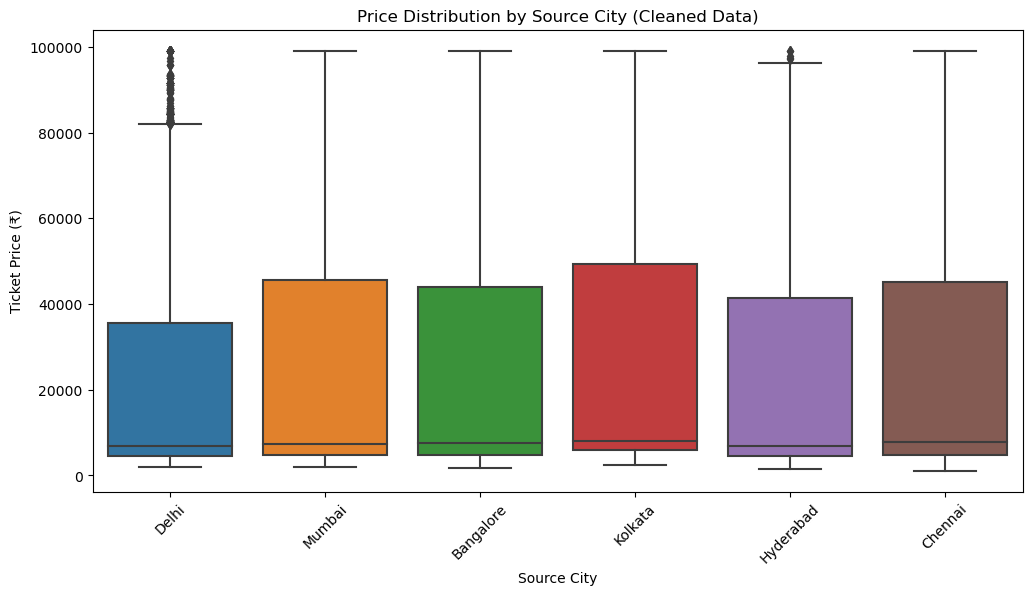

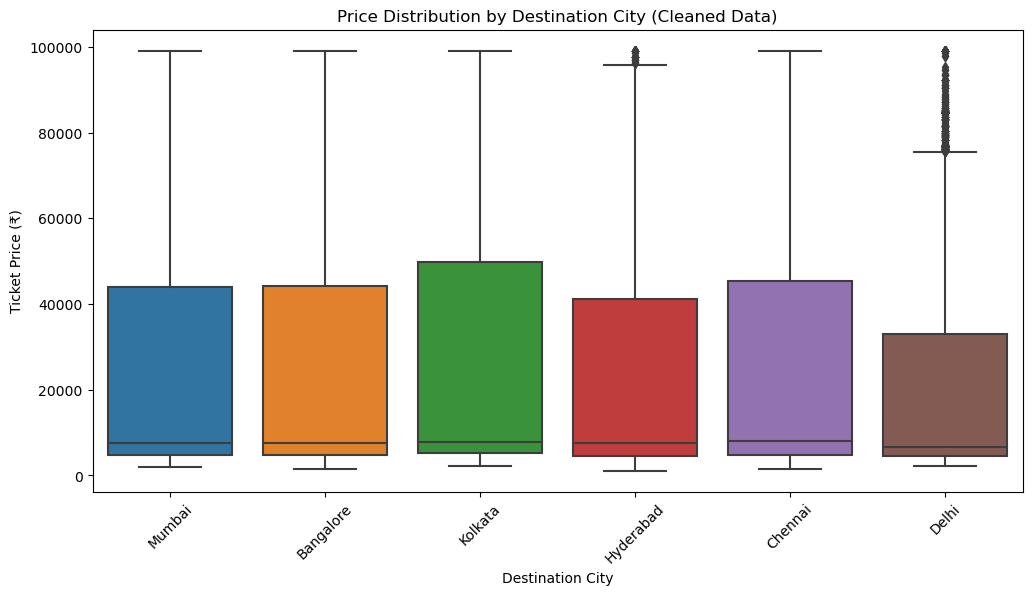

In [81]:
# 📌 Source City – Flight Counts and Average Prices
print("📌 Source City – Flight Counts and Average Prices:\n")
source_counts = df_cleaned['source_city'].value_counts()
source_avg_prices = df_cleaned.groupby('source_city')['price'].mean()

for city in source_counts.index:
    print(f"- {city}: {source_counts[city]} flights, average price: ₹{source_avg_prices[city]:,.2f}")

print("\n" + "-"*60 + "\n")

# 📌 Destination City – Flight Counts and Average Prices
print("📌 Destination City – Flight Counts and Average Prices:\n")
dest_counts = df_cleaned['destination_city'].value_counts()
dest_avg_prices = df_cleaned.groupby('destination_city')['price'].mean()

for city in dest_counts.index:
    print(f"- {city}: {dest_counts[city]} flights, average price: ₹{dest_avg_prices[city]:,.2f}")

# 🎨 Boxplot – Source City
plt.figure(figsize=(12, 6))
sns.boxplot(x='source_city', y='price', data=df_cleaned)
plt.title('Price Distribution by Source City (Cleaned Data)')
plt.xlabel('Source City')
plt.ylabel('Ticket Price (₹)')
plt.xticks(rotation=45)
plt.show()

# 🎨 Boxplot – Destination City
plt.figure(figsize=(12, 6))
sns.boxplot(x='destination_city', y='price', data=df_cleaned)
plt.title('Price Distribution by Destination City (Cleaned Data)')
plt.xlabel('Destination City')
plt.ylabel('Ticket Price (₹)')
plt.xticks(rotation=45)
plt.show()


In [82]:

# 1. Encode source_city ve destination_city (drop_first=True ile referans belirlenmiş olur)
df_encoded = pd.get_dummies(df_cleaned, columns=['source_city', 'destination_city'], drop_first=True)

# 2. Bağımsız değişkenleri seç (float tipinde olmalı)
X = df_encoded[[col for col in df_encoded.columns if col.startswith('source_city_') or col.startswith('destination_city_')]]
X = X.astype(float)

# 3. Bağımlı değişken (price) – temizlenmiş hali
y = df_encoded['price'].astype(float)

# 4. Sabit terimi (β₀) ekle
X = sm.add_constant(X)

# 5. Modeli kur ve özetle
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     227.4
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:18:40   Log-Likelihood:            -3.4352e+06
No. Observations:              300153   AIC:                         6.870e+06
Df Residuals:                  300142   BIC:                         6.871e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

 # Impact of Source and Destination Cities on Flight Prices
Based on our OLS regression analysis, both source and destination cities have a statistically significant but limited effect on flight ticket prices. The model’s R² is only 0.008, meaning these two variables explain less than 1% of the price variance.

📌 Key Findings:
Flights departing from Delhi are approximately ₹3681 cheaper than those from the reference city (Bangalore).

Hyderabad departures are around ₹1848 cheaper.

Chennai departures are about ₹506 more expensive.

Flights arriving in Delhi are around ₹4197 cheaper on average.

Chennai arrivals are about ₹410 more expensive.

Hyderabad and Mumbai arrivals are also significantly cheaper.

Other cities, like Kolkata and Mumbai departures, do not show statistically significant price differences.

 # Conclusion:
Although city of departure and arrival influence flight prices to some extent, they are not strong predictors.